In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from utils import *
from utils_plotting import *

In [3]:
sns.set(style='ticks')

# Prepare data

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='u-g')

Data shape: (91317, 42)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing U-G < 0: 32998 left


In [5]:
catalog_star = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_rf_f-colors-cstar_cut-u-g__2018-04-24_15:28:29.csv')
catalog_non_star = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_non-star_sdss-clean_rf_f-colors-cstar_cut-u-g__2018-04-24_15:45:06.csv')

print(catalog_star.shape)
print(catalog_non_star.shape)

(1525347, 18)
(3786201, 18)


In [6]:
for catalog in [catalog_star, catalog_non_star]:
    catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

catalog = pd.concat([catalog_star, catalog_non_star])
print(catalog.shape)

(5311548, 19)


In [7]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [8]:
qso_catalog_star = catalog_star.loc[catalog_star['CLASS'] == 'QSO']
qso_catalog_non_star = catalog_non_star.loc[catalog_non_star['CLASS'] == 'QSO']

In [9]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [10]:
catalog_star_sampled = catalog_star.sample(20000, random_state=78356)
catalog_non_star_sampled = catalog_non_star.sample(20000, random_state=78356)

In [11]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [12]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5]
kids_x_sdss_non_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.5]

In [13]:
print(qso_catalog_star.shape[0])
print(qso_catalog_non_star.shape[0])

383242
677713


In [14]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17097,  5658, 10243]),
 array([51.81223104, 17.14649373, 31.04127523]))

In [15]:
describe_column(kids_x_sdss_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  128,  5206, 10162]),
 array([ 0.82601962, 33.59576665, 65.57821373]))

In [16]:
describe_column(kids_x_sdss_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([16969,   452,    81]),
 array([96.95463376,  2.58256199,  0.46280425]))

In [17]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([3107705, 1060955, 1142888]),
 array([58.50846119, 19.97449708, 21.51704174]))

In [18]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1920376,  659814,  818294]),
 array([56.50684246, 19.4149509 , 24.07820664]))

In [19]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1187329,  401141,  324594]),
 array([62.06425922, 20.96850916, 16.96723162]))

In [20]:
describe_column(catalog_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  13961,  383242, 1128144]),
 array([ 0.91526715, 25.124906  , 73.95982685]))

In [21]:
describe_column(catalog_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([3093744,  677713,   14744]),
 array([81.71103436, 17.89955156,  0.38941409]))

# Photo catalogs

In [22]:
qso_catalogs_report(catalog, save=True)

Catalog size: 5311548
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3107705, 1060955, 1142888]), array([58.50846119, 19.97449708, 21.51704174]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog x KiDS size: 19930
QSO catalog x KiDS catalog size: 11682, train elements: 2508
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 532, 9833, 1317]), array([ 4.55401472, 84.17223078, 11.27375449]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog x KiDS size: 22368
QSO catalog x KiDS catalog size: 13590, train elements: 2949
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  458, 12050,  1082]), array([ 3.37012509, 88.66813834,  7.96173657]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog x KiDS size: 70749
QSO catalog x KiDS catalog size: 38843, train elements: 5474
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 4171, 26805,  7867]), array([10.73809953, 69.00857297, 20.2533275 ]))


In [23]:
qso_catalogs_report(catalog_star)

Catalog size: 1525347
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  13961,  383242, 1128144]), array([ 0.91526715, 25.124906  , 73.95982685]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog x KiDS size: 19930
QSO catalog x KiDS catalog size: 10662, train elements: 2461
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  54, 9298, 1310]), array([ 0.50647158, 87.20690302, 12.2866254 ]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog x KiDS size: 22368
QSO catalog x KiDS catalog size: 12684, train elements: 2896
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   98, 11514,  1072]), array([ 0.77262693, 90.77578051,  8.45159256]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog x KiDS size: 70749
QSO catalog x KiDS catalog size: 32322, train elements: 5339
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  340, 24215,  7767]), array([ 1.0519151, 74.9180125, 24.0300724]))


In [24]:
qso_catalogs_report(catalog_non_star)

Catalog size: 3786201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3093744,  677713,   14744]), array([81.71103436, 17.89955156,  0.38941409]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
QSO catalog x KiDS size: 19930
QSO catalog x KiDS catalog size: 1020, train elements: 47
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([478, 535,   7]), array([46.8627451 , 52.45098039,  0.68627451]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
QSO catalog x KiDS size: 22368
QSO catalog x KiDS catalog size: 906, train elements: 53
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([360, 536,  10]), array([39.73509934, 59.1611479 ,  1.10375276]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
QSO catalog x KiDS size: 70749
QSO catalog x KiDS catalog size: 6521, train elements: 135
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3831, 2590,  100]), array([58.74865818, 39.71783469,  1.53350713]))


# t-SNE visualization

## Star

In [25]:
catalog_to_plot = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5].sample(10000, random_state=8945)
catalog_to_plot['CLASS'] += '_SDSS'
catalog_to_plot = catalog_to_plot.append(catalog_star.loc[~catalog_star['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [26]:
X = catalog_to_plot[FEATURES['colors-cstar']]
X_scaled = MinMaxScaler().fit_transform(X)

In [27]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

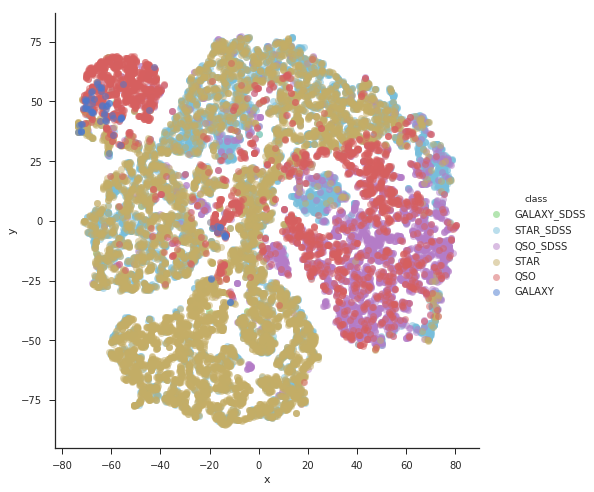

In [28]:
plot_embedding(X_embedded, catalog_to_plot['CLASS'], label_name='class')

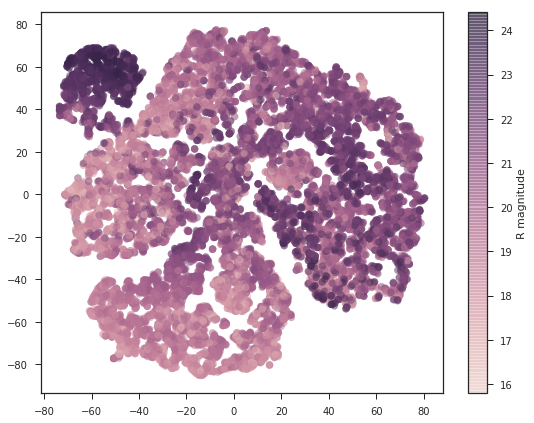

In [29]:
plot_embedding(X_embedded, catalog_to_plot[MAG_GAAP_CALIB_R], label_name='R magnitude', is_continuous=True)

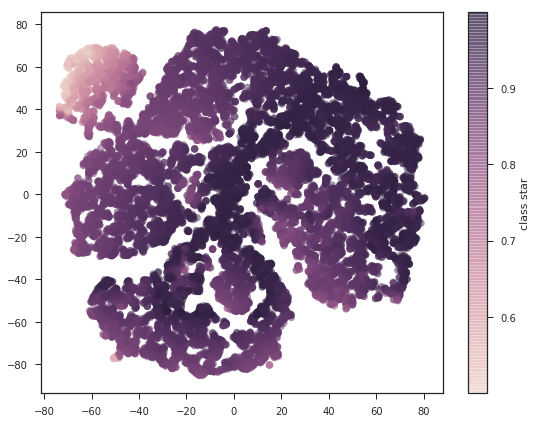

In [30]:
plot_embedding(X_embedded, catalog_to_plot['CLASS_STAR'], label_name='class star', is_continuous=True)

## Non-star

In [31]:
catalog_to_plot = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR']<= 0.5].sample(10000, random_state=8945)
catalog_to_plot['CLASS'] += '_SDSS'
catalog_to_plot = catalog_to_plot.append(catalog_non_star.loc[~catalog_non_star['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [32]:
X = catalog_to_plot[FEATURES['colors-cstar']]
X_scaled = MinMaxScaler().fit_transform(X)

In [33]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

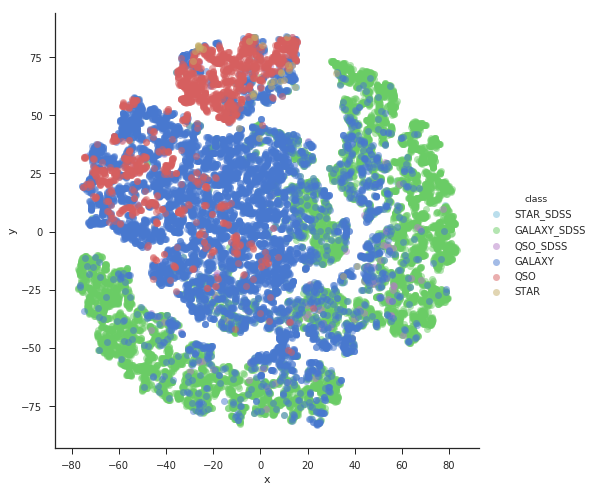

In [34]:
plot_embedding(X_embedded, catalog_to_plot['CLASS'], label_name='class')

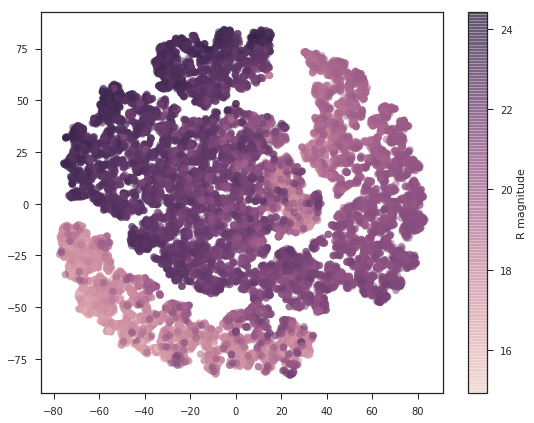

In [35]:
plot_embedding(X_embedded, catalog_to_plot[MAG_GAAP_CALIB_R], label_name='R magnitude', alpha=0.5, is_continuous=True)

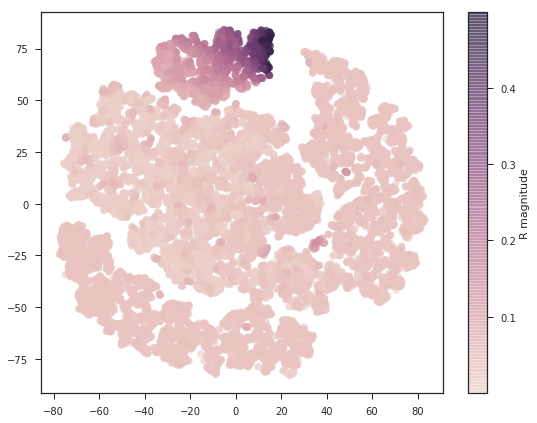

In [36]:
plot_embedding(X_embedded, catalog_to_plot['CLASS_STAR'], label_name='R magnitude', alpha=0.5, is_continuous=True)

# Standalone bands

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


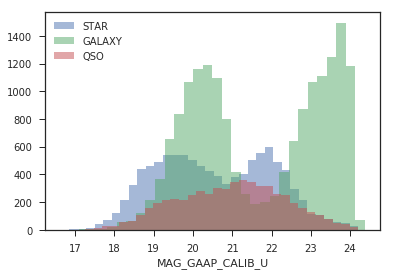

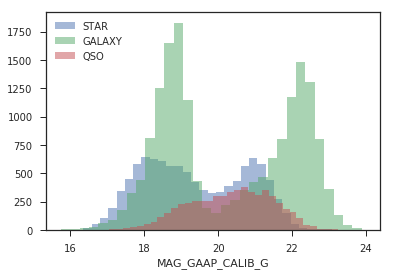

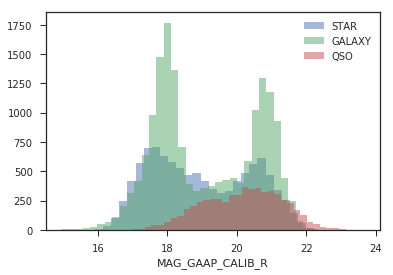

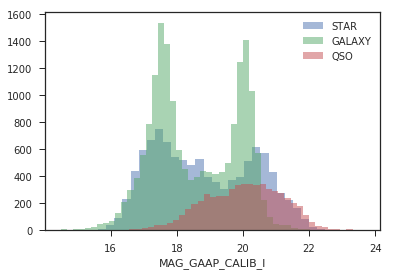

In [37]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


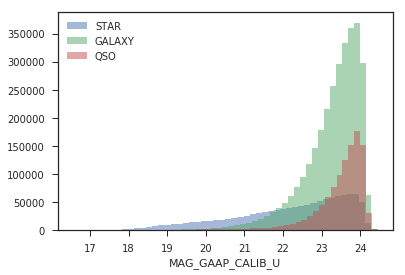

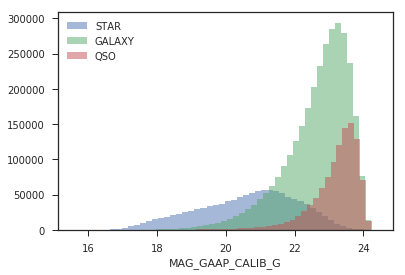

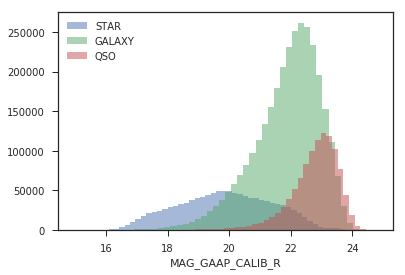

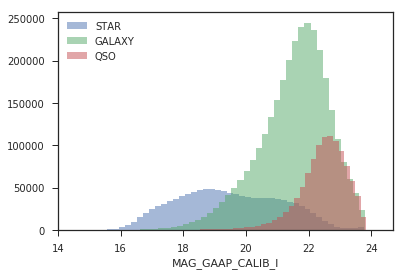

In [38]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


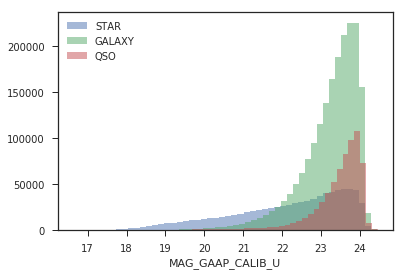

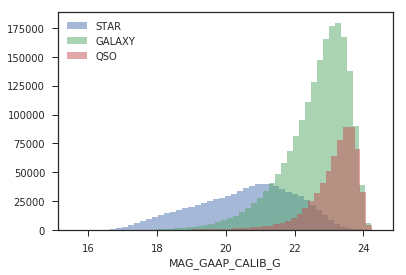

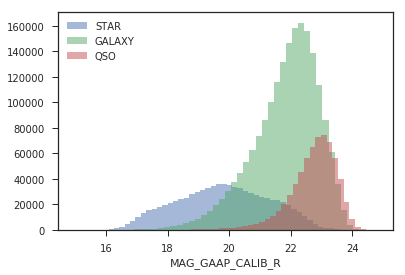

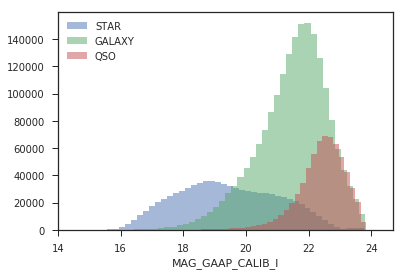

In [39]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


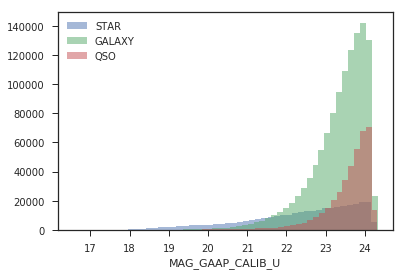

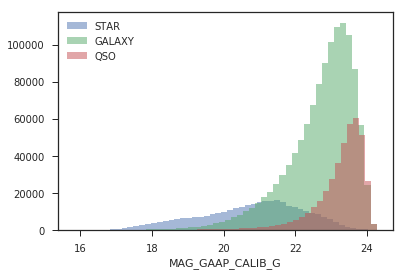

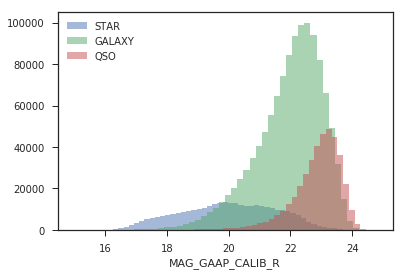

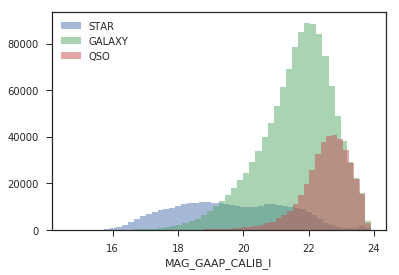

In [40]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

# Paired bands

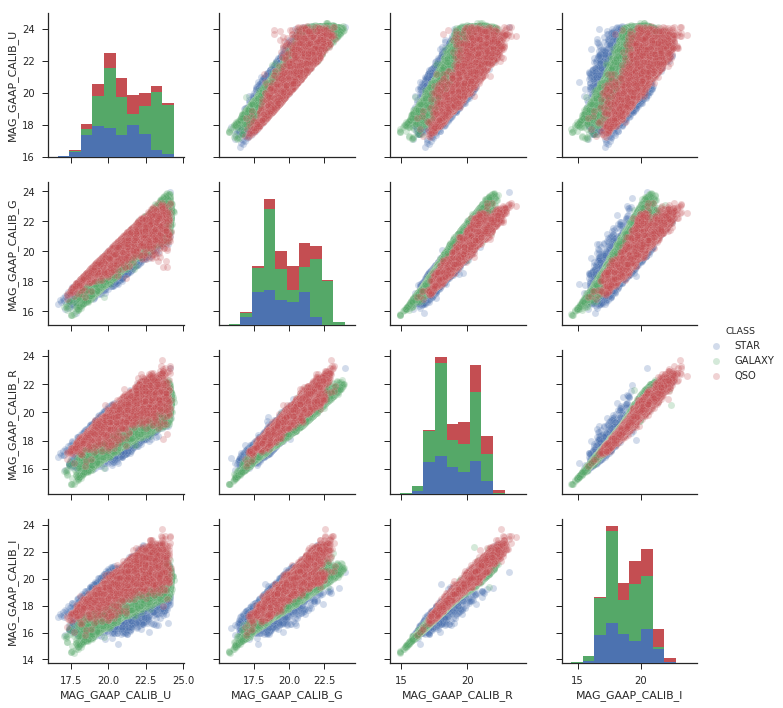

In [41]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

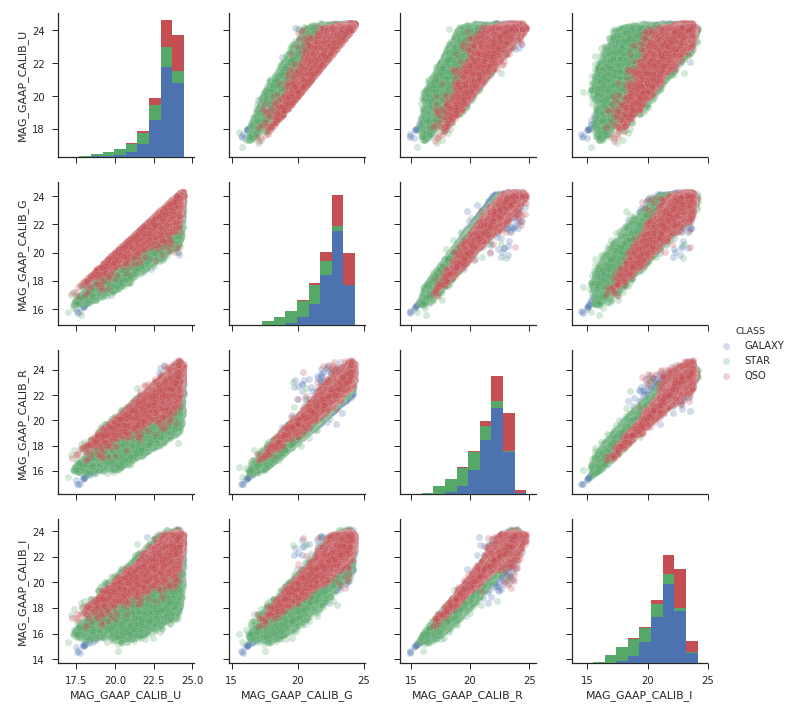

In [42]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

# Standalone colors

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


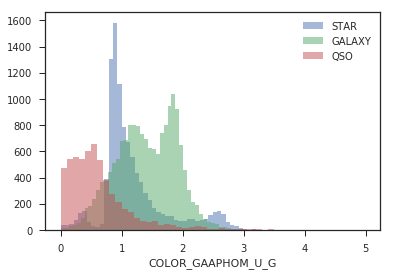

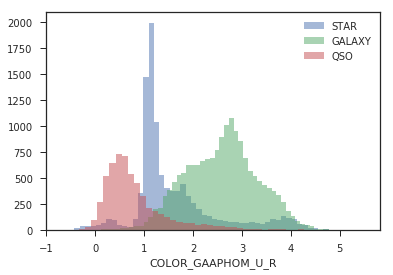

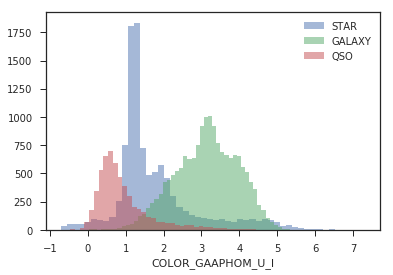

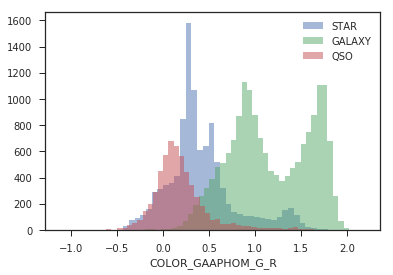

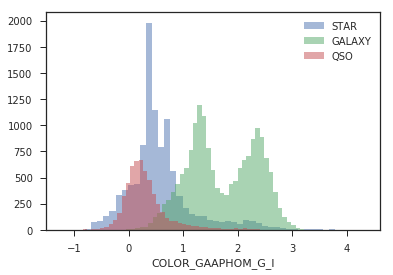

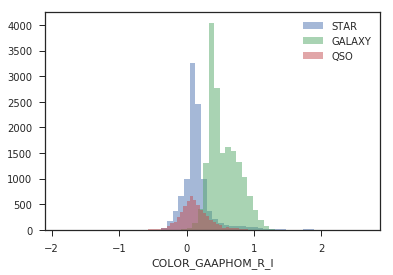

In [43]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


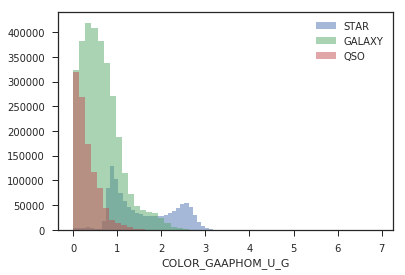

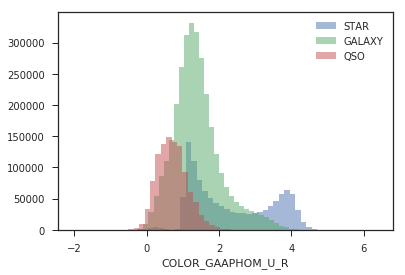

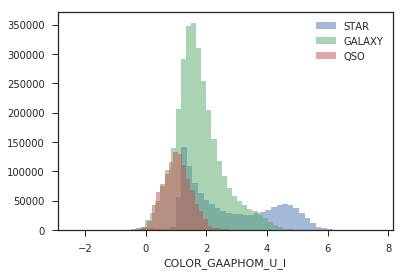

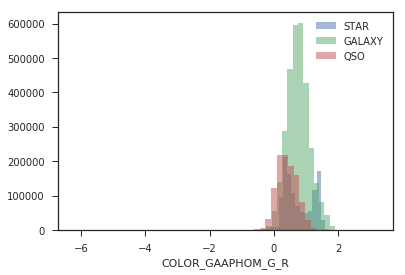

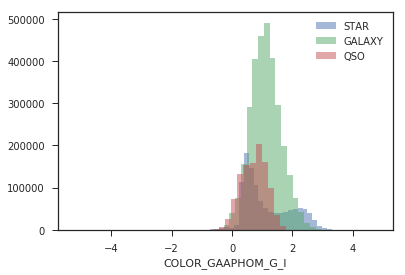

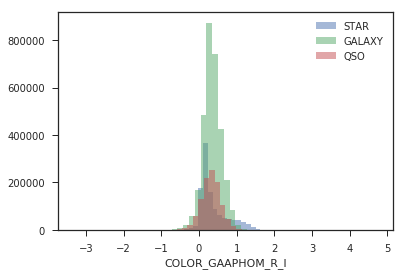

In [44]:
plot_class_histograms(catalog, COLOR_COLUMNS)

# Paired colors

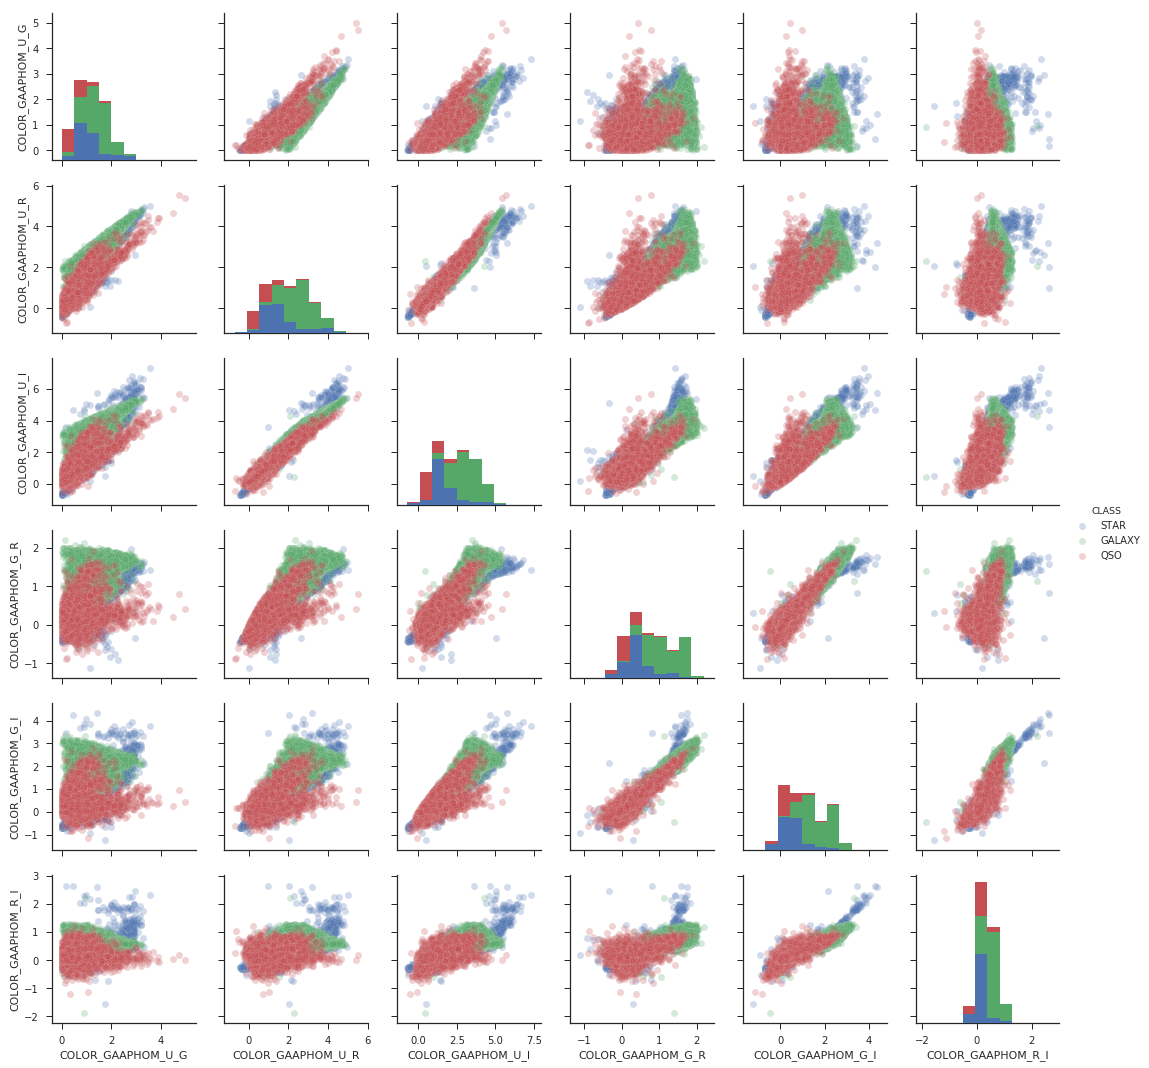

In [45]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

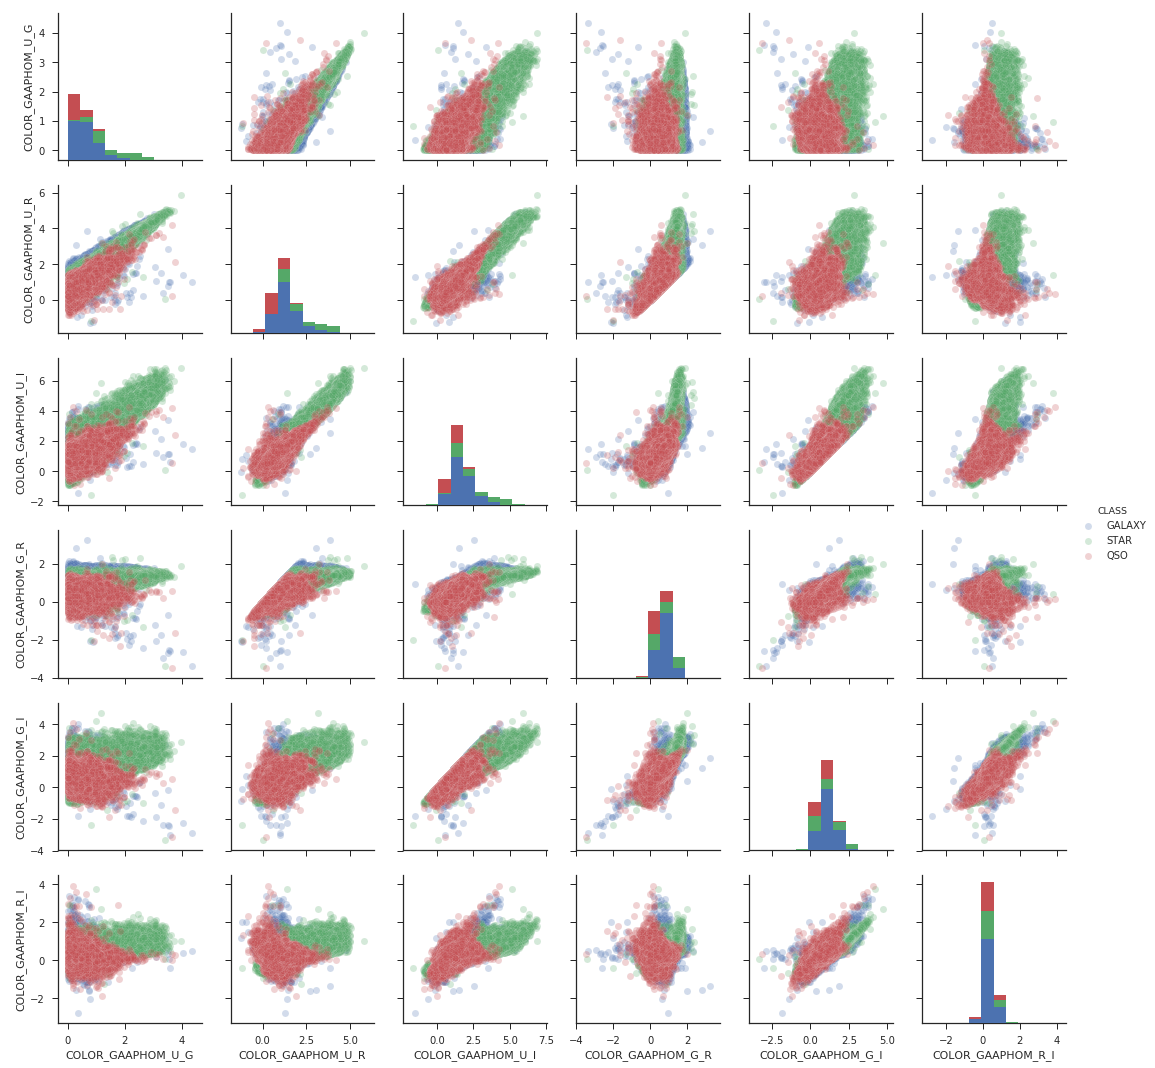

In [46]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

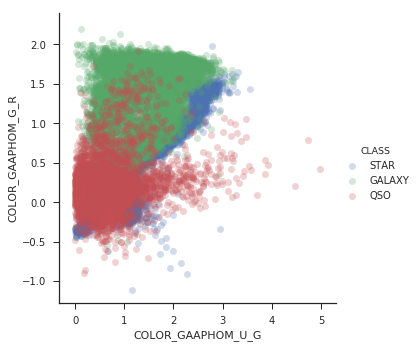

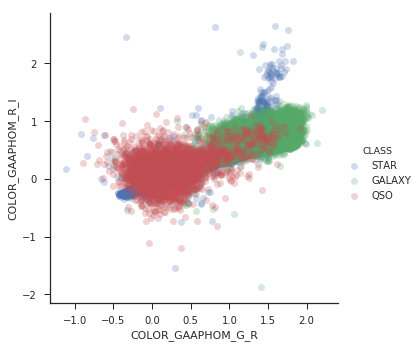

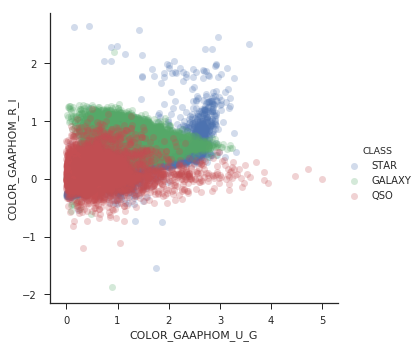

In [47]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

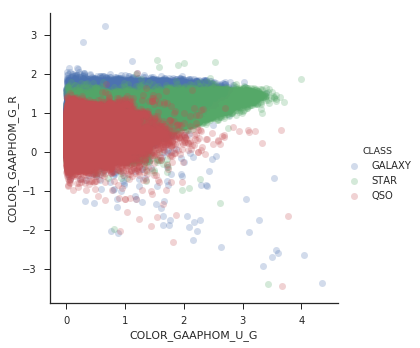

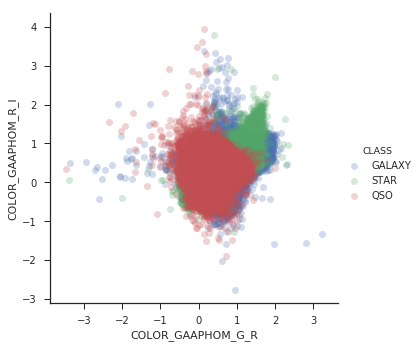

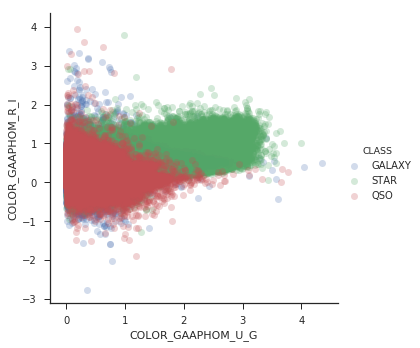

In [48]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

# QSO color pairs

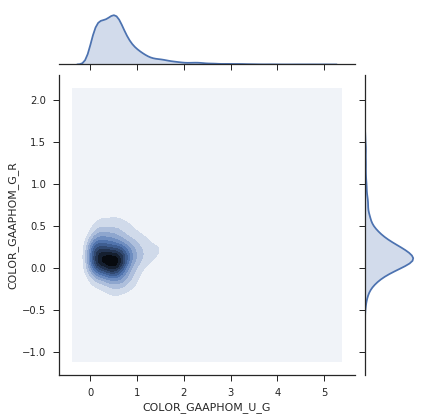

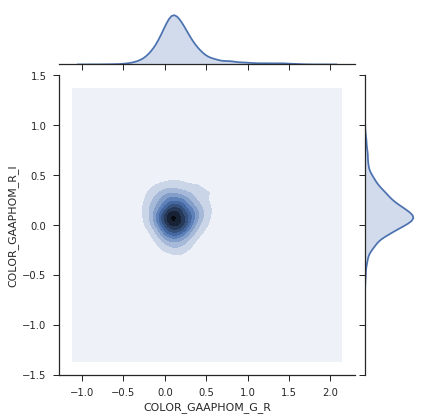

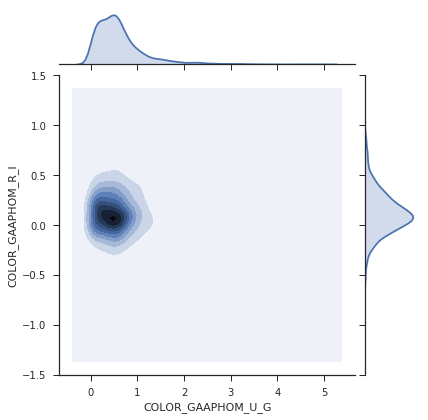

In [49]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

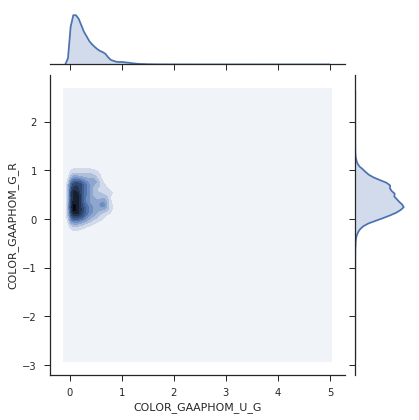

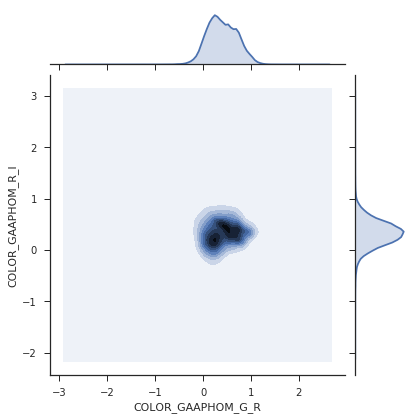

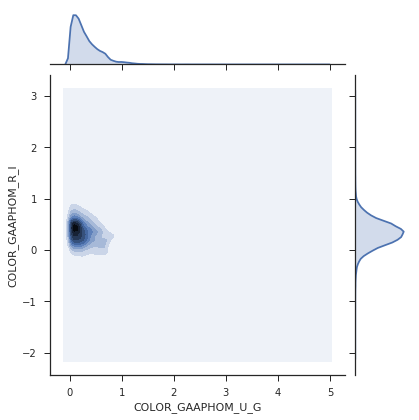

In [50]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

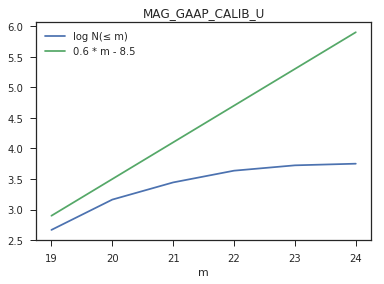

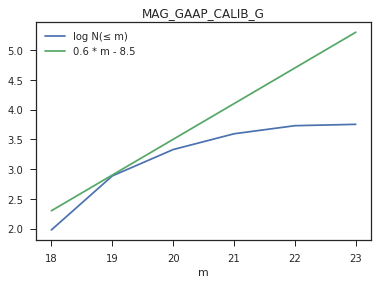

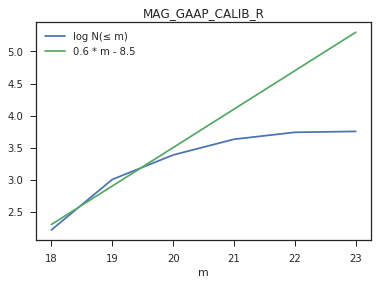

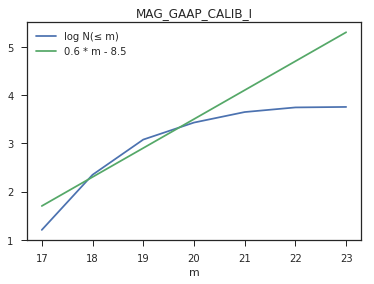

In [51]:
number_count_analysis(qso_kids_sdss, c=8.5)

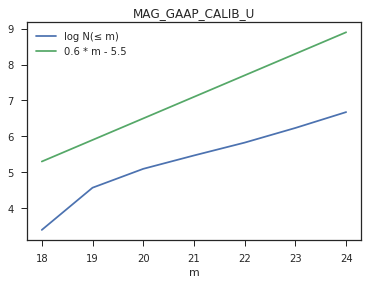

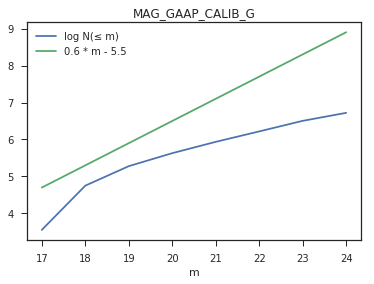

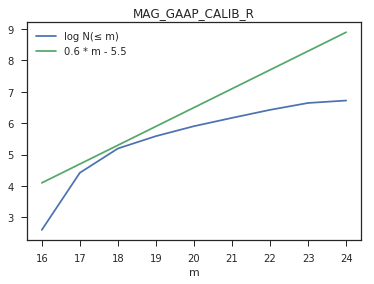

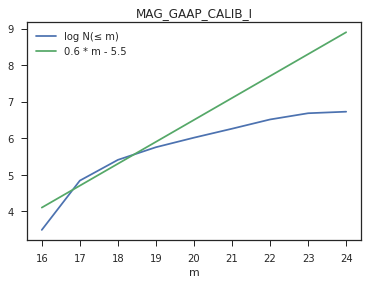

In [52]:
number_count_analysis(catalog, c=5.5)

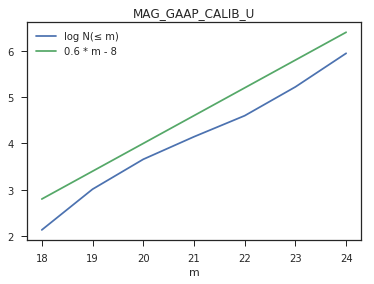

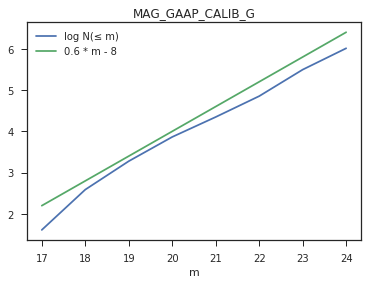

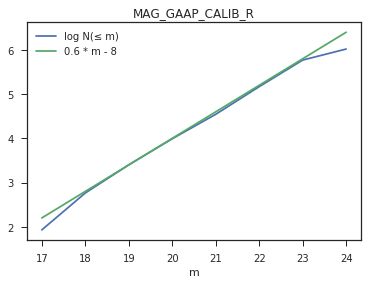

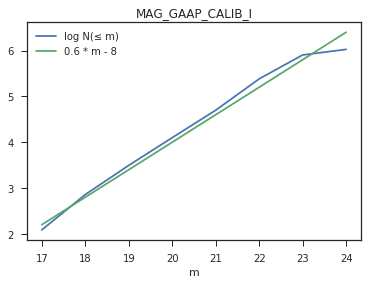

In [53]:
number_count_analysis(qso_catalog, c=8)

# Maps

In [12]:
map_stars, lon_stars, lat_stars = get_weighted_map(nside=128)

<IPython.core.display.Javascript object>


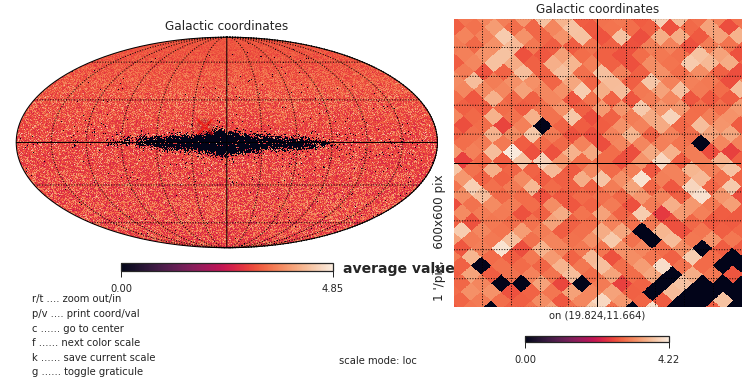

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [13]:
%matplotlib notebook
plot_map(map_stars, unit='average value per pixel', is_cmap=False)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


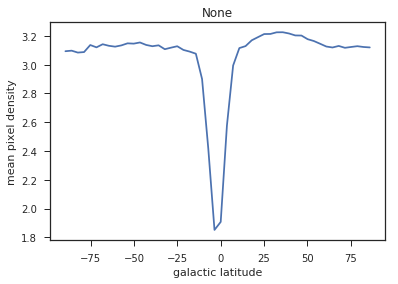

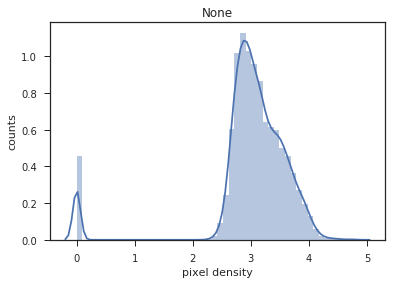

In [24]:
%matplotlib inline
plot_map_stats(map_stars, lat_stars)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


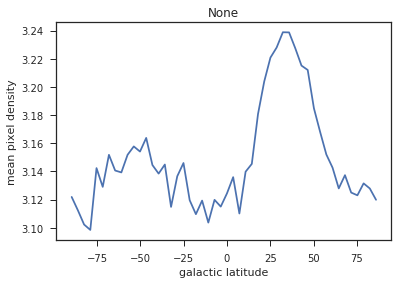

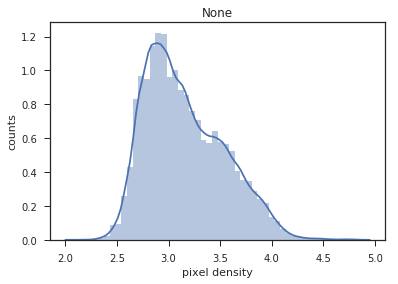

In [25]:
%matplotlib inline
plot_partial_map_stats(map_stars, lat_stars)

In [26]:
m, lon, lat = get_map(kids_x_sdss['GAL_LONG'], kids_x_sdss['GAL_LAT'], nside=128)

<IPython.core.display.Javascript object>


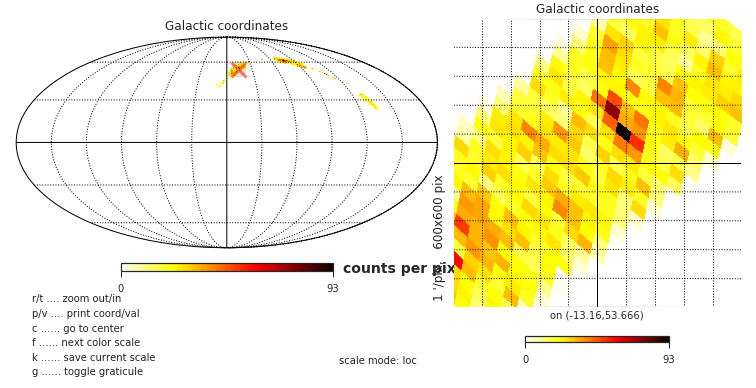

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [15]:
%matplotlib notebook
plot_map(m)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


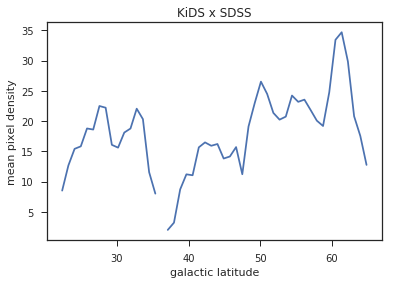

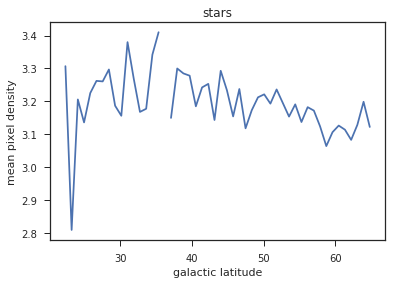

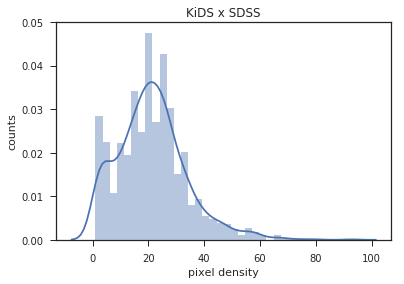

In [27]:
%matplotlib inline
plot_partial_map_stats(m, lat, map_stars, 'KiDS x SDSS')

In [28]:
m, lon, lat = get_map(qso_kids_sdss['GAL_LONG'], qso_kids_sdss['GAL_LAT'], nside=128)

<IPython.core.display.Javascript object>


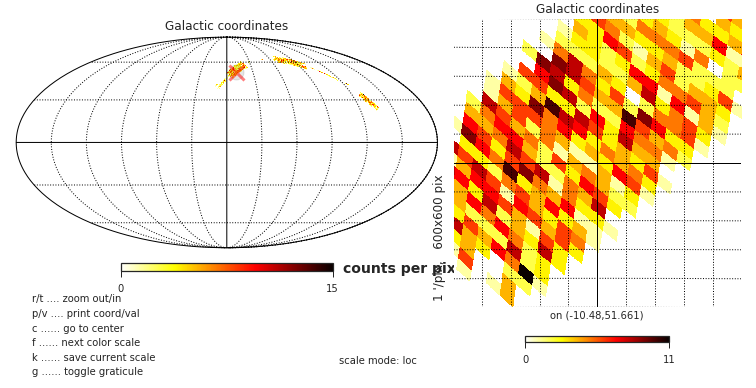

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [17]:
%matplotlib notebook
plot_map(m)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


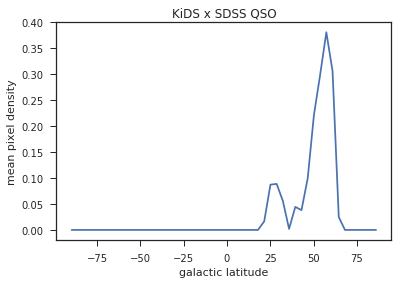

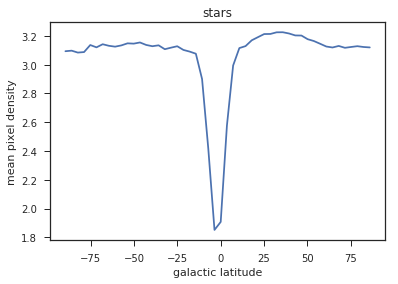

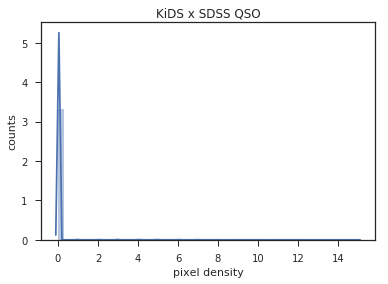

In [29]:
%matplotlib inline
plot_map_stats(m, lat, map_stars, 'KiDS x SDSS QSO')

In [13]:
map_catalog, lon, lat = get_map(catalog['GAL_LONG'], catalog['GAL_LAT'], nside=128)

<IPython.core.display.Javascript object>


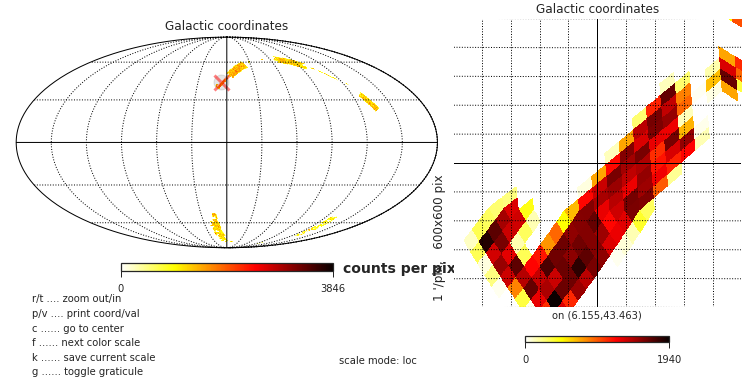

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [19]:
%matplotlib notebook
plot_map(map_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


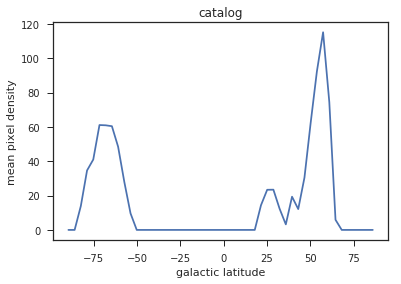

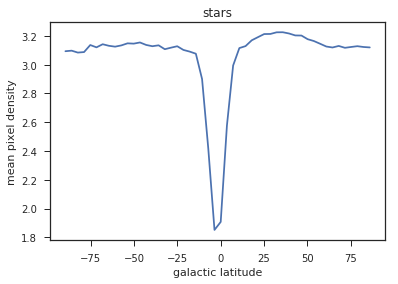

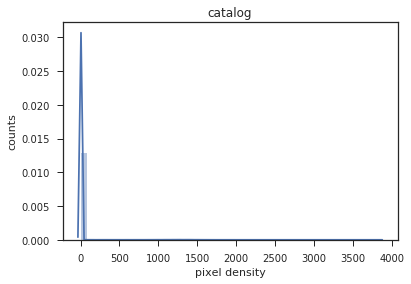

In [31]:
%matplotlib inline
plot_map_stats(map_catalog, lat, map_stars, 'catalog')

In [14]:
map_qso_catalog, lon, lat = get_map(qso_catalog['GAL_LONG'], qso_catalog['GAL_LAT'], nside=128)

<IPython.core.display.Javascript object>


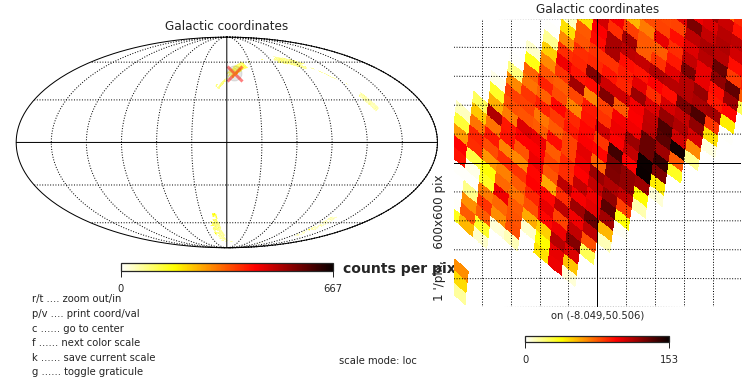

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [21]:
%matplotlib notebook
plot_map(map_qso_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


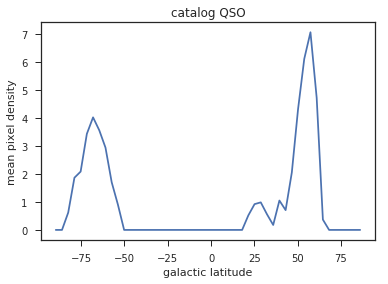

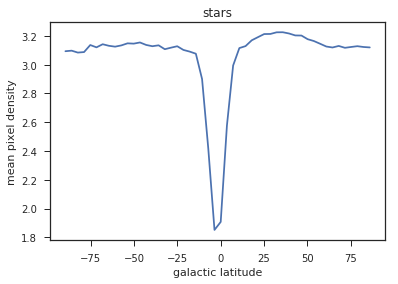

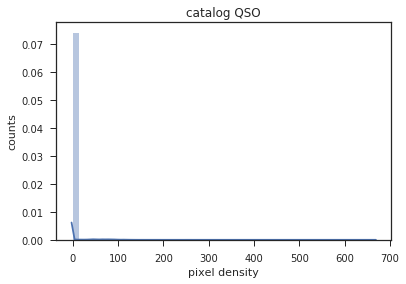

In [33]:
%matplotlib inline
plot_map_stats(map_qso_catalog, lat, map_stars, 'catalog QSO')

In [15]:
map_qso_normalized = normalize_map(map_qso_catalog, map_catalog)

<IPython.core.display.Javascript object>


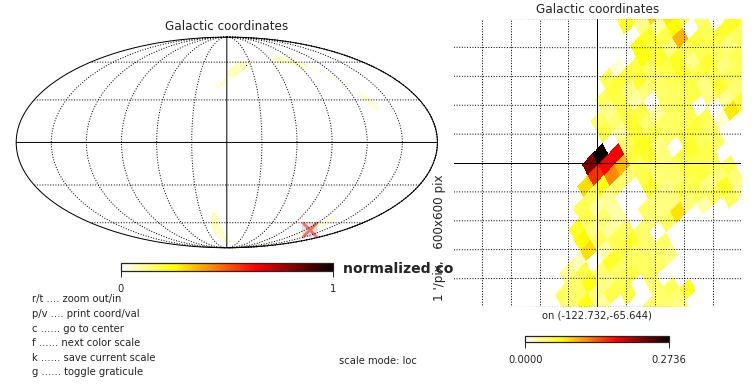

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [16]:
%matplotlib notebook
plot_map(map_qso_normalized, unit='normalized counts per pixel')

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


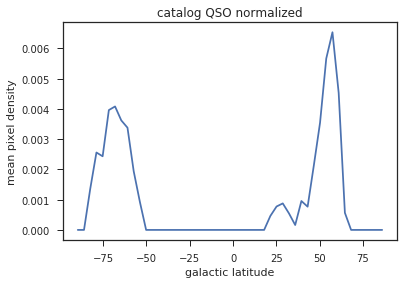

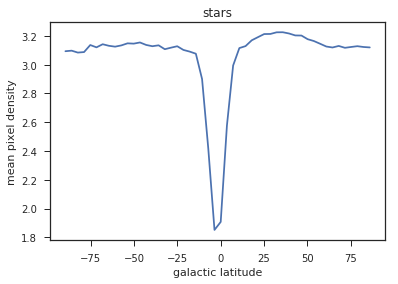

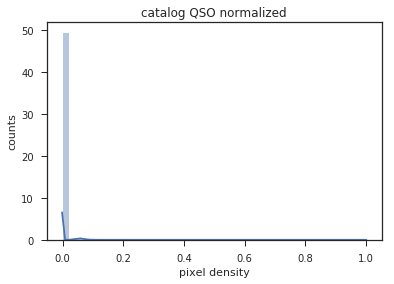

In [39]:
%matplotlib inline
plot_map_stats(map_qso_normalized, lat, map_stars, 'catalog QSO normalized')

In [47]:
m, lon, lat = get_map(qso_catalog_non_star['GAL_LONG'], qso_catalog_non_star['GAL_LAT'], nside=128)

<IPython.core.display.Javascript object>


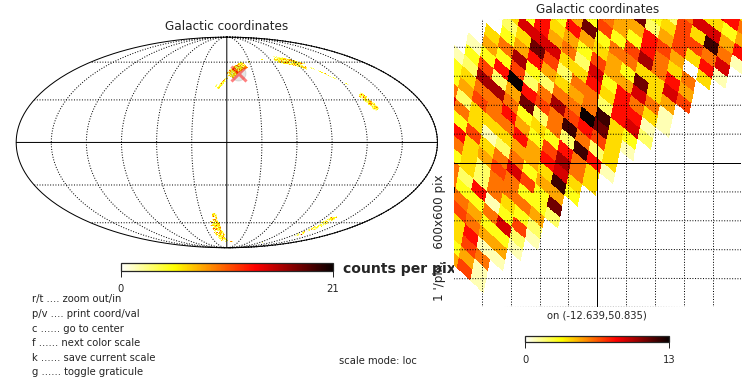

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [23]:
%matplotlib notebook
plot_map(m)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


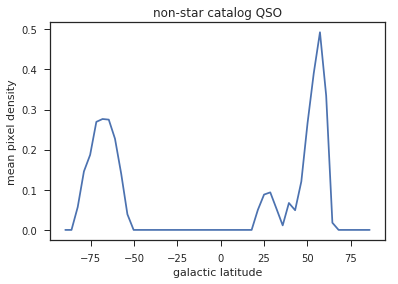

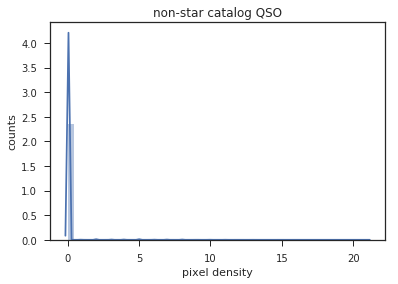

In [48]:
%matplotlib inline
plot_map_stats(m, lat, title='non-star catalog QSO')

# CLASS_STAR

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


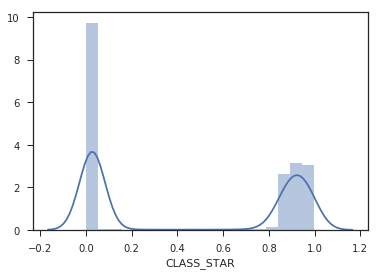

In [45]:
sns.distplot(kids_x_sdss['CLASS_STAR'])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


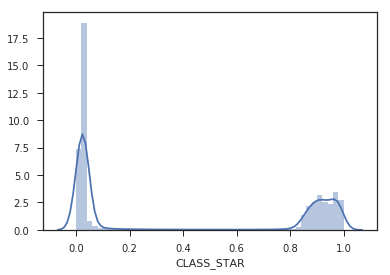

In [46]:
sns.distplot(catalog['CLASS_STAR'])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


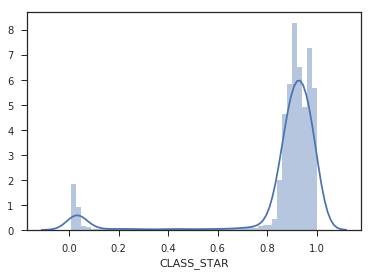

In [47]:
sns.distplot(qso_kids_sdss['CLASS_STAR'])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


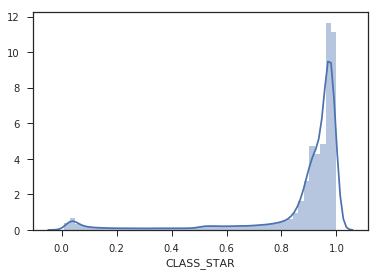

In [48]:
sns.distplot(qso_catalog['CLASS_STAR'])

## Color-color plots

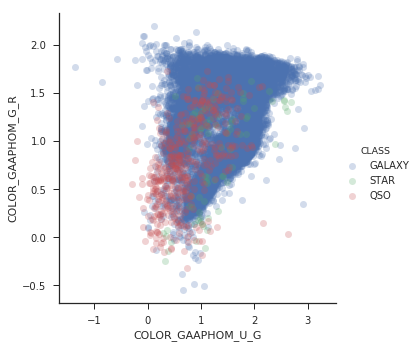

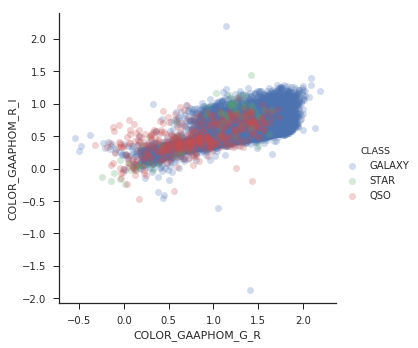

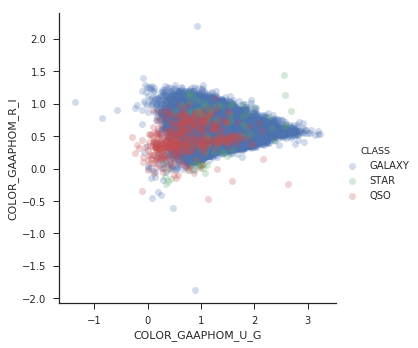

In [49]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

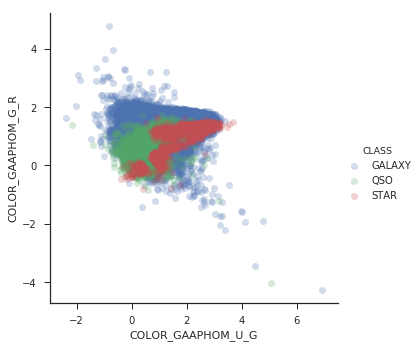

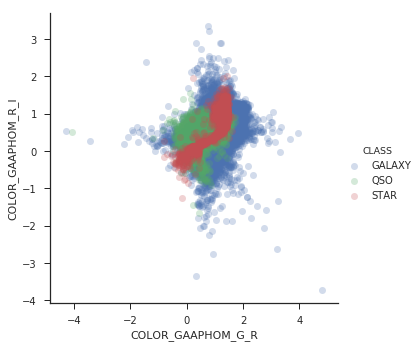

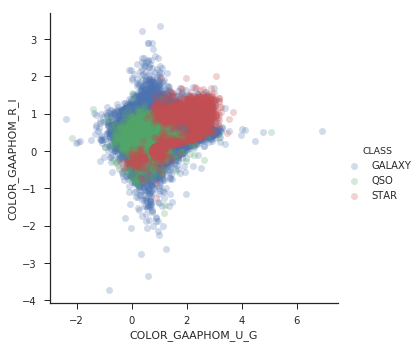

In [50]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

# Predictions

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


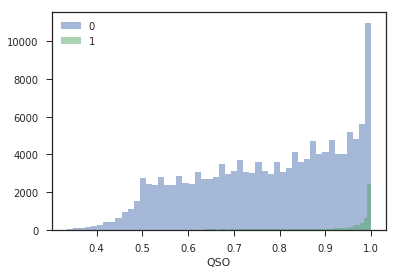

In [43]:
for t in [0, 1]:
    sns.distplot(catalog_star.loc[(catalog_star['train'] == t) & (catalog_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


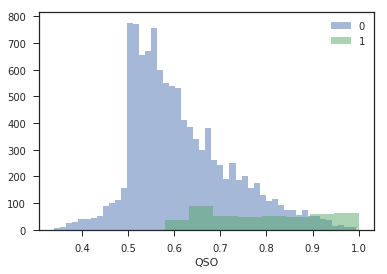

In [44]:
for t in [0, 1]:
    sns.distplot(catalog_non_star.loc[(catalog_non_star['train'] == t) & (catalog_non_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()